In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [11]:
# Load and preprocess the data
data = pd.read_csv('uber.csv')
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime']) # Convert to datetime object
data['hour'] = data['pickup_datetime'].dt.hour # Extract hour of the day
data['month'] = data['pickup_datetime'].dt.month
data['day'] = data['pickup_datetime'].dt.day
data['day_of_week'] = data['pickup_datetime'].dt.dayofweek # Extract day of the week
X = data[['hour', 'day_of_week']].values # Input features as numerical values
y = data['day'].values # Target variable as numerical values

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Create and train the ML model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 76.05121853962397


In [15]:
# Make predictions for new data
new_data = pd.DataFrame({'hour': [8, 12, 18], 'day_of_week': [1, 3, 6]}) # Example new data
new_predictions = model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [16]:
# Check the shape of X_test and confirm the column index for the hour column
print("X_test shape:", X_test.shape)

X_test shape: (40000, 2)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


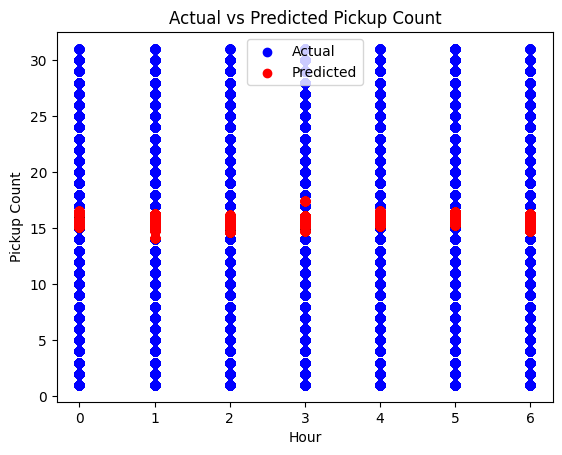

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual') # Access the hour column using index 1
plt.scatter(X_test[:, 1], predictions, color='red', label='Predicted') # Access the hour column using index 1
plt.xlabel('Hour')
plt.ylabel('Pickup Count')
plt.title('Actual vs Predicted Pickup Count')
plt.legend()
plt.show()

In [19]:
# Identify peak hours
peak_hours = pd.Series(X_test[:, 1]).value_counts().sort_values(ascending=False).head(3) # Access the hour column using index 1
print("Peak Hours:", peak_hours)

Peak Hours: 4    6216
5    6124
3    6009
Name: count, dtype: int64


In [22]:
# Make decisions based on predictions
threshold = 100 # Example threshold value
if new_predictions[0] > threshold:
  print("Expected high demand during the specified hour.")
# Take appropriate actions, such as allocating more drivers or offering promotions.
else:
   print("Expected normal demand during the specified hour.")
# Continue with regular operations.

Expected normal demand during the specified hour.
